In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Cleaned_Data.csv")
df.head()

,Unnamed: 0,rating,reviews,amenities,house_rules,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin_final,checkout_final
0,0,4.710000,64,"Mountain view,Valley view,Lake access,Kitchen,...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",8078,Turkey,1,1,2,0,2,0,Flexible,12.0
1,1,4.824406,0,"Kitchen,Wifi,Dedicated workspace,Free parking ...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",4665,Turkey,2,2,4,0,2,0,16,10.0
2,2,4.850000,68,"Mountain view,Kitchen,Wifi,Dedicated workspace...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",5991,Georgia,1,3,4,0,1,0,13,12.0
3,3,5.000000,13,"Mountain view,Valley view,Kitchen,Wifi,Free pa...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",11339,Turkey,1,2,4,0,1,0,14,12.0
4,4,4.824406,0,"Kitchen,Wifi,Free parking on premises,TV,Air c...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",6673,Turkey,1,1,2,0,1,0,14,12.0


In [6]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [7]:
df

,rating,reviews,amenities,house_rules,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin_final,checkout_final
0,4.710000,64,"Mountain view,Valley view,Lake access,Kitchen,...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",8078,Turkey,1,1,2,0,2,0,Flexible,12.0
1,4.824406,0,"Kitchen,Wifi,Dedicated workspace,Free parking ...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",4665,Turkey,2,2,4,0,2,0,16,10.0
2,4.850000,68,"Mountain view,Kitchen,Wifi,Dedicated workspace...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",5991,Georgia,1,3,4,0,1,0,13,12.0
3,5.000000,13,"Mountain view,Valley view,Kitchen,Wifi,Free pa...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",11339,Turkey,1,2,4,0,1,0,14,12.0
4,4.824406,0,"Kitchen,Wifi,Free parking on premises,TV,Air c...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",6673,Turkey,1,1,2,0,1,0,14,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12800,4.940000,16,"Kitchen,Wifi,Free parking on premises,Private ...","Check-in: 3:00 pm - 11:00 pm,Check out: 11:00 ...",4288,South Korea,8,0,4,0,0,0,15,11.0
12801,4.670000,6,"Wifi,Free on-street parking,Air conditioning,G...","Check-in: 3:00 pm - 10:00 pm,Check out: 12:00 ...",15200,Indonesia,0,1,2,1,1,0,15,12.0
12802,4.670000,3,"Wifi,Breakfast,Long-term stays allowed,Unavail...",Check-in: After 3:00 pm,9103,Uganda,1,2,2,0,1,0,15,NaN
12803,4.860000,7,"Kitchen,Wifi,Dedicated workspace,Free parking ...","Check-in: Flexible,Check out: 12:00 pm,No pets...",42262,Indonesia,2,4,8,0,2,0,Flexible,12.0


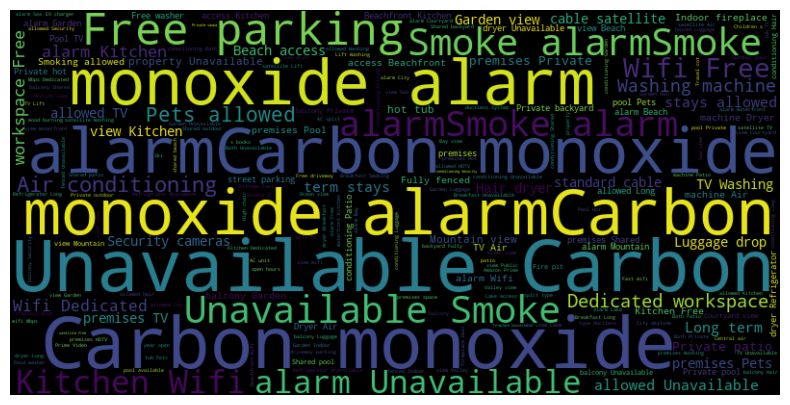

In [8]:
from wordcloud import WordCloud

column_name = 'amenities'
text_data = df[column_name]

df_1 = pd.DataFrame({'text': text_data})

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(df_1['text']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

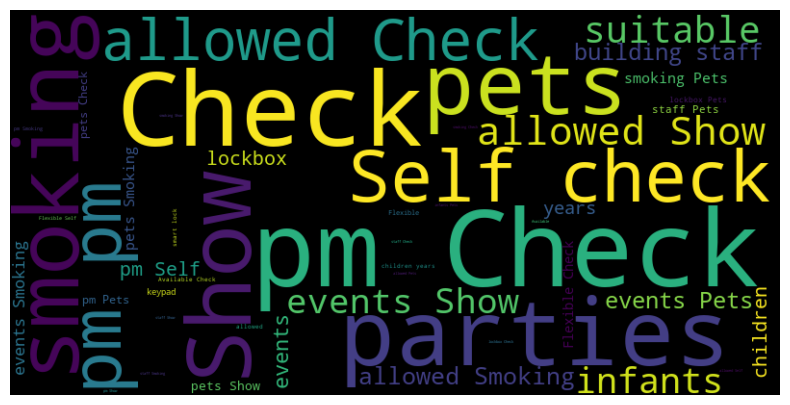

In [9]:
column_name = 'house_rules'
text_data = df[column_name]

df_1 = pd.DataFrame({'text': text_data})
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(df_1['text']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

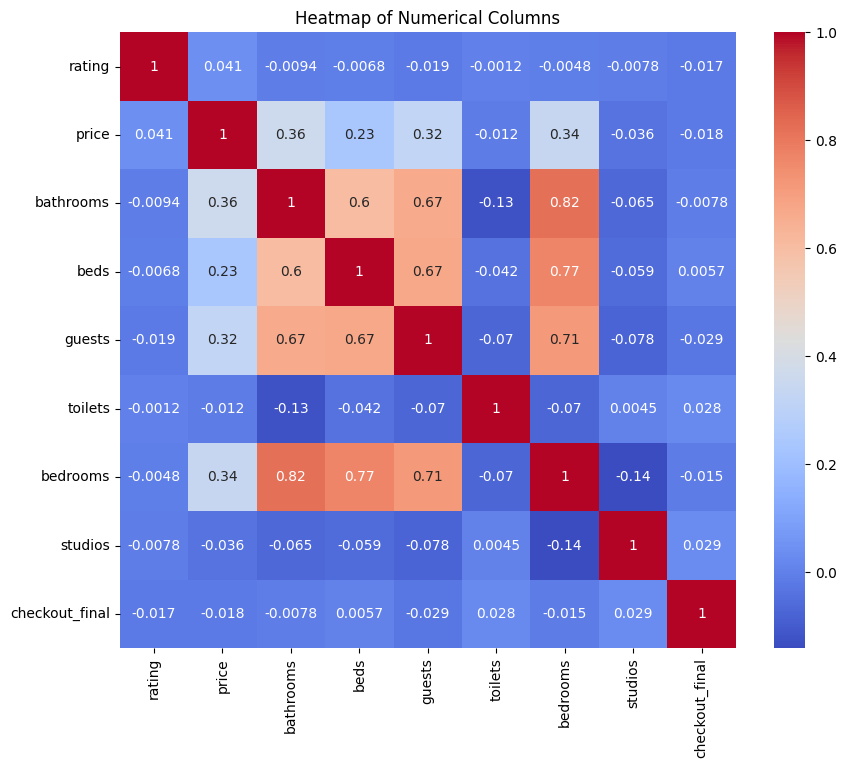

In [10]:


numerical_cols = df.select_dtypes(include=[int, float]).columns

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap of Numerical Columns')
plt.show()

C:\Users\jaink\AppData\Local\Temp\ipykernel_6648\934096010.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_country = df_top_countries.groupby(['country', 'price_category'])['price'].mean().unstack().fillna(0)


<Figure size 1500x1500 with 0 Axes>

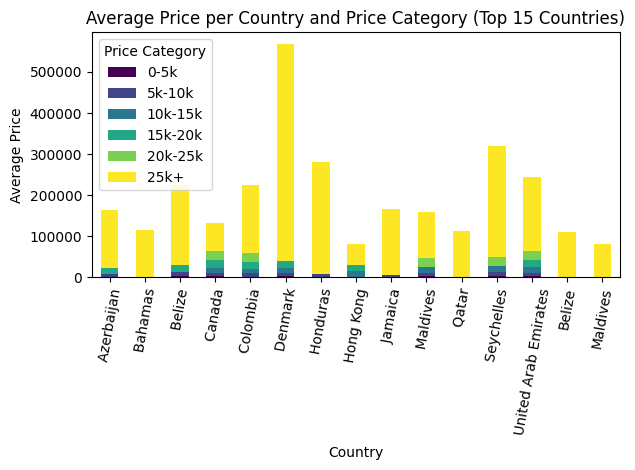

In [11]:
bins = [0, 5000, 10000, 15000, 20000, 25000, float('inf')]
labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k+']

df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

avg_price_per_country = df.groupby('country')['price'].mean().sort_values(ascending=False).head(15)

top_countries = avg_price_per_country.index.tolist()
df_top_countries = df[df['country'].isin(top_countries)]

avg_price_country = df_top_countries.groupby(['country', 'price_category'])['price'].mean().unstack().fillna(0)

plt.figure(figsize=(15 , 15))
avg_price_country.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Average Price per Country and Price Category (Top 15 Countries)')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.xticks(rotation=80)
plt.tight_layout()
plt.legend(title='Price Category')
plt.show()

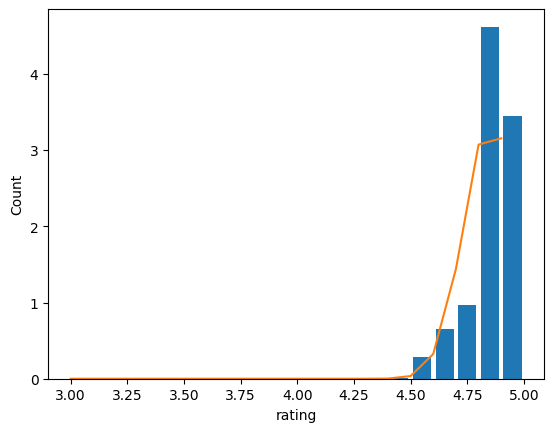

In [24]:
from scipy.stats import norm
import numpy as np
plt.hist(df.rating, bins=20, rwidth=0.8, density=True)
plt.xlabel('rating')
plt.ylabel('Count')

rng = np.arange(df.rating.min(), df.rating.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.rating.mean(),df.rating.std()))

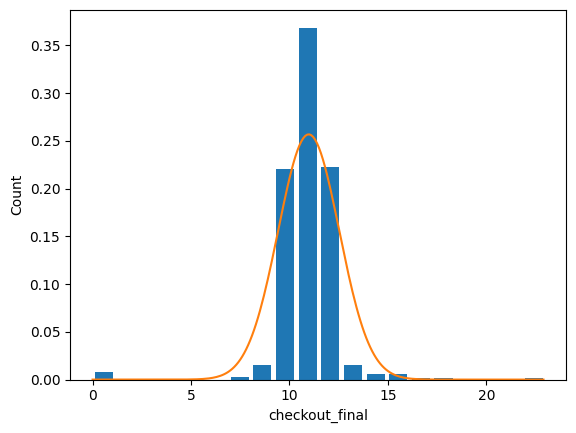

In [7]:
plt.hist(df.checkout_final, bins=20, rwidth=0.8, density=True)
plt.xlabel('checkout_final')
plt.ylabel('Count')

rng = np.arange(df.checkout_final.min(), df.checkout_final.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.checkout_final.mean(),df.checkout_final.std()))

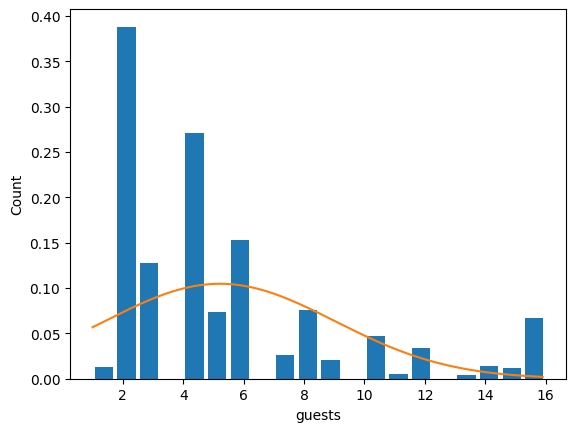

In [26]:
plt.hist(df.guests, bins=20, rwidth=0.8, density=True)
plt.xlabel('guests')
plt.ylabel('Count')

rng = np.arange(df.guests.min(), df.guests.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.guests.mean(),df.guests.std()))

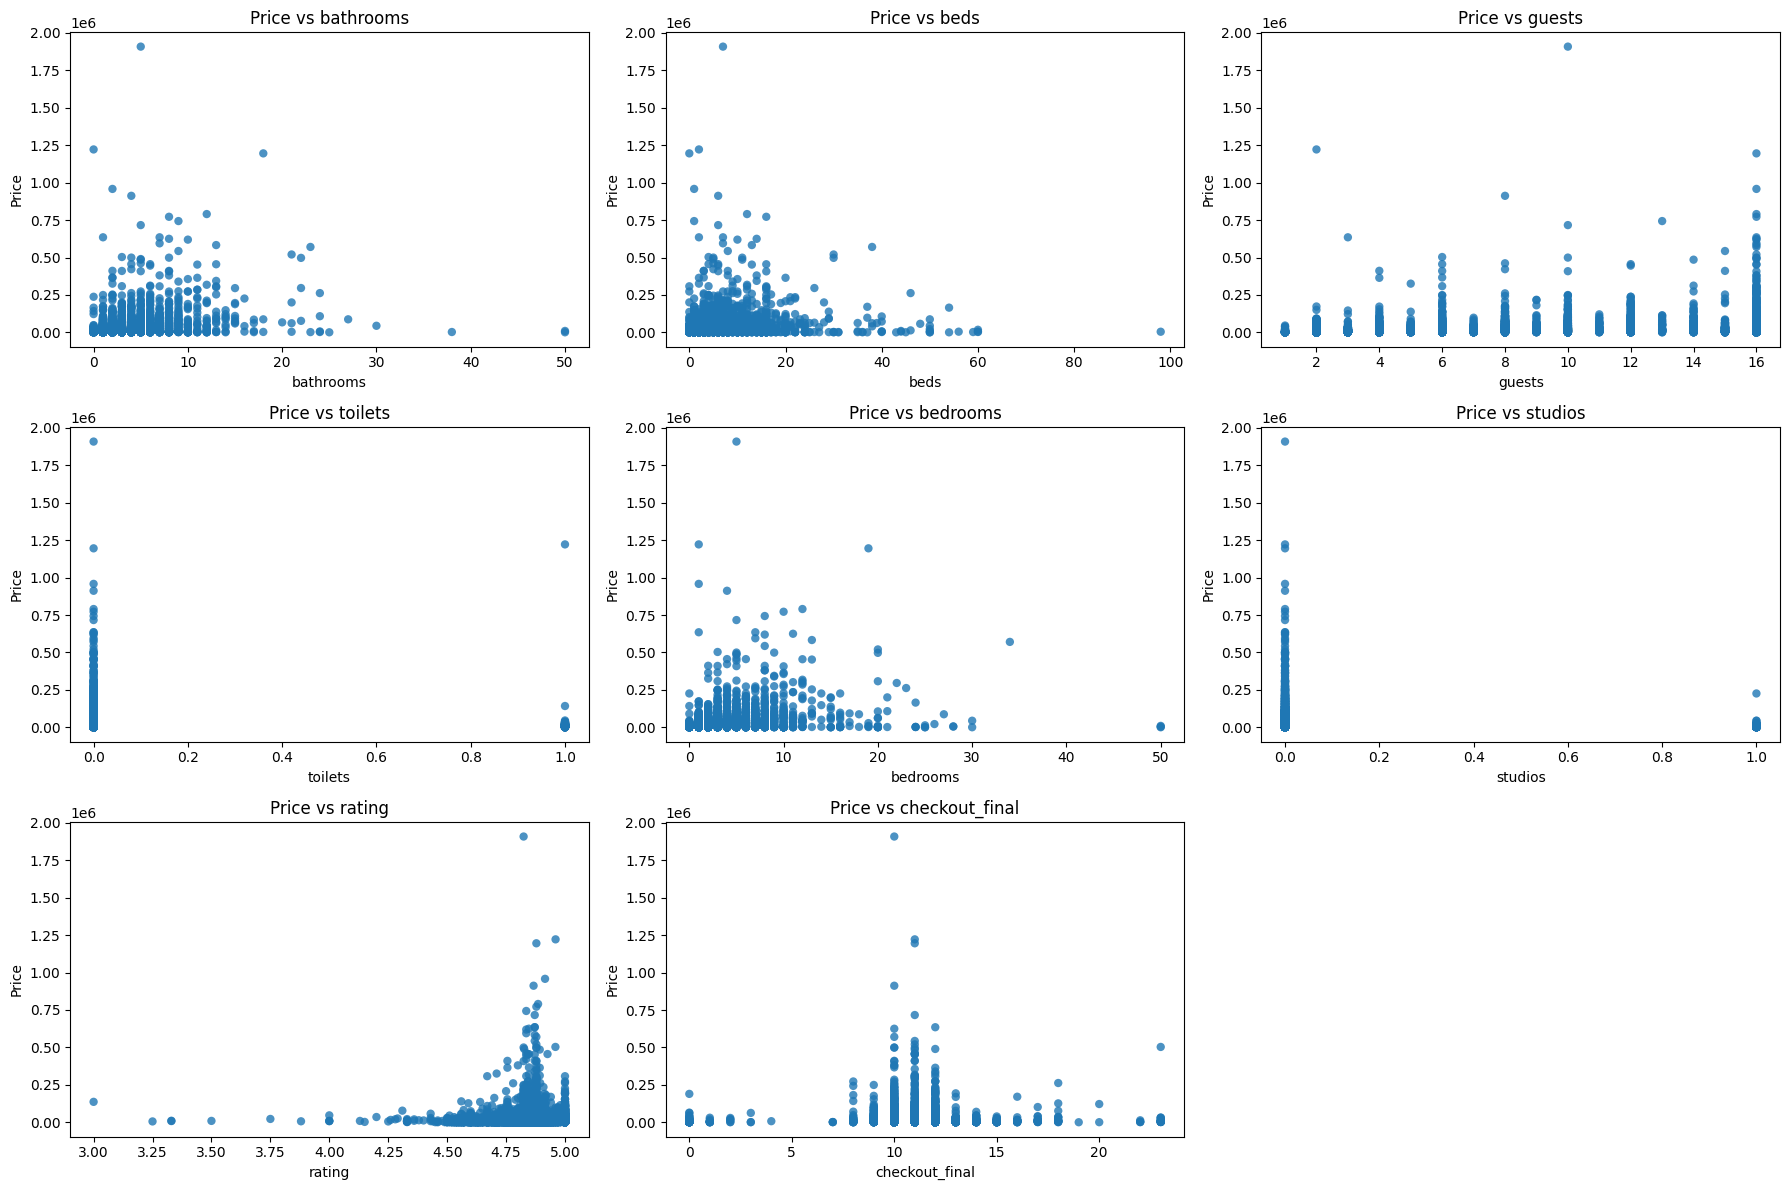

In [14]:

features = ['bathrooms', 'beds', 'guests', 'toilets', 'bedrooms', 'studios' , 'rating', 'checkout_final']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df['price'], alpha=0.8, marker='o', edgecolors='none')
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    
plt.tight_layout()
plt.show()


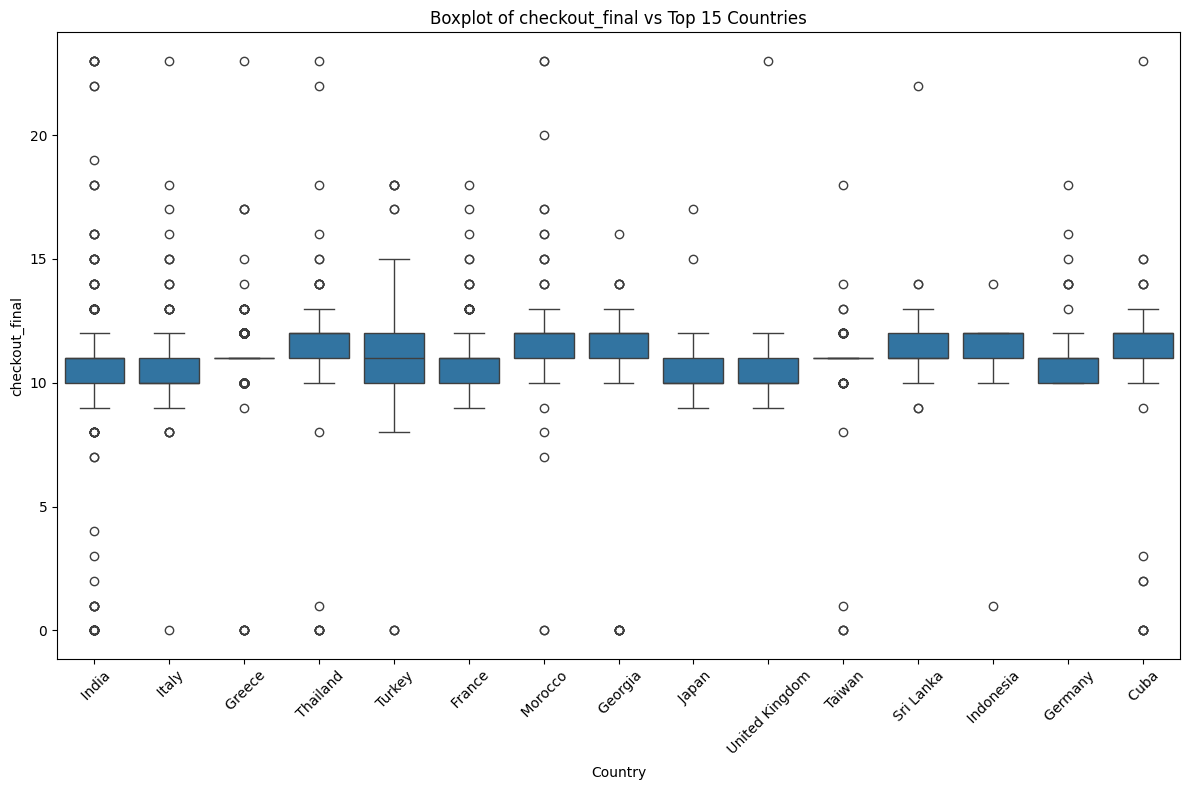

In [15]:
top_15_countries = df['country'].value_counts().nlargest(15).index.tolist()
df_top_15 = df[df['country'].isin(top_15_countries)]

plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('checkout_final')
plt.title('Boxplot of checkout_final vs Top 15 Countries')

sns.boxplot(x='country', y='checkout_final', data=df_top_15, order=top_15_countries)

plt.tight_layout()
plt.show()


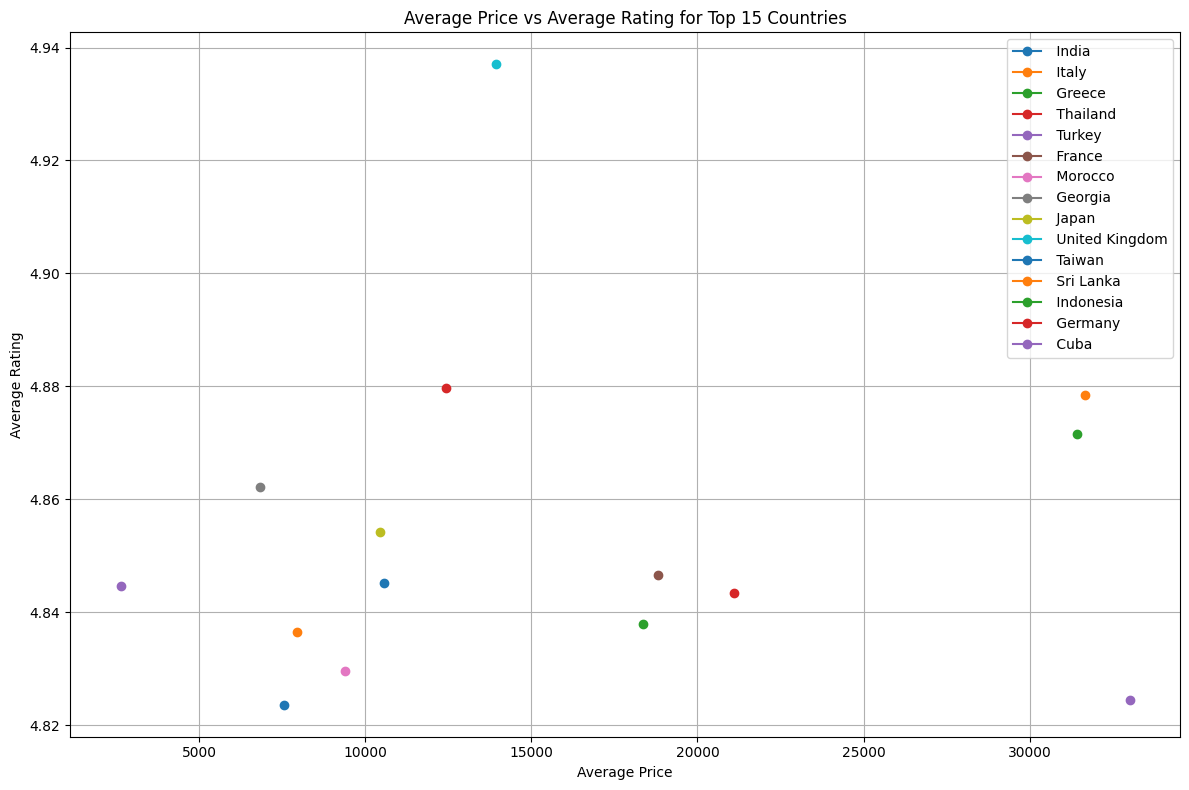

In [16]:

top_15_countries = df['country'].value_counts().nlargest(15).index.tolist()

plt.figure(figsize=(12, 8))

for country in top_15_countries:
    df_country = df[df['country'] == country]
    avg_price = df_country['price'].mean()
    avg_rating = df_country['rating'].mean()
    
    plt.plot(avg_price, avg_rating, marker='o', linestyle='-', label=country)

plt.xlabel('Average Price')
plt.ylabel('Average Rating')
plt.title('Average Price vs Average Rating for Top 15 Countries')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


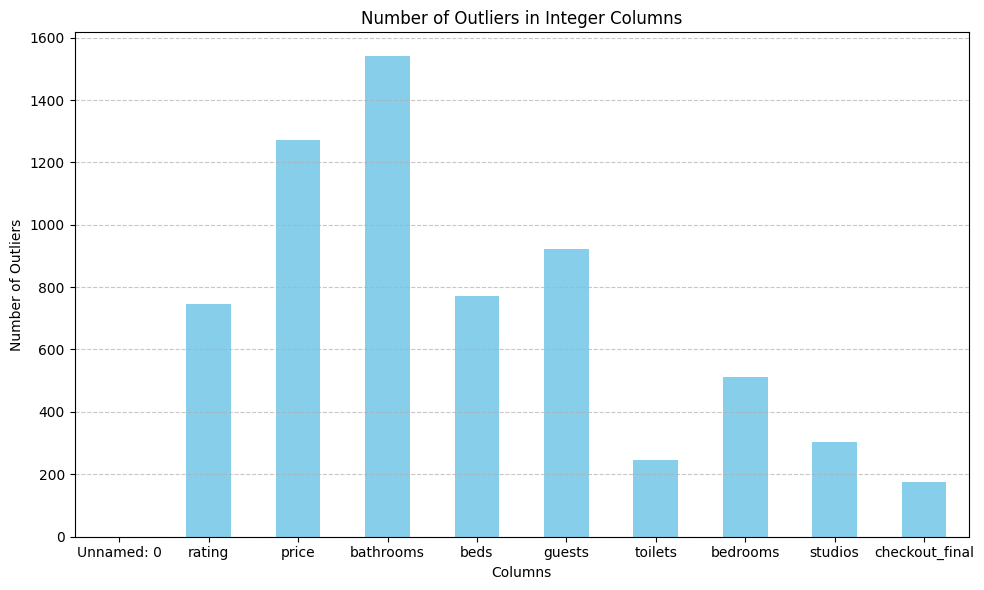

In [9]:
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum()

outlier_counts = {}
for column in df.select_dtypes(include=np.number):
    outlier_counts[column] = count_outliers(df[column])
outlier_counts_series = pd.Series(outlier_counts)

plt.figure(figsize=(10, 6))
outlier_counts_series.plot(kind='bar', color='skyblue')
plt.title('Number of Outliers in Integer Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()

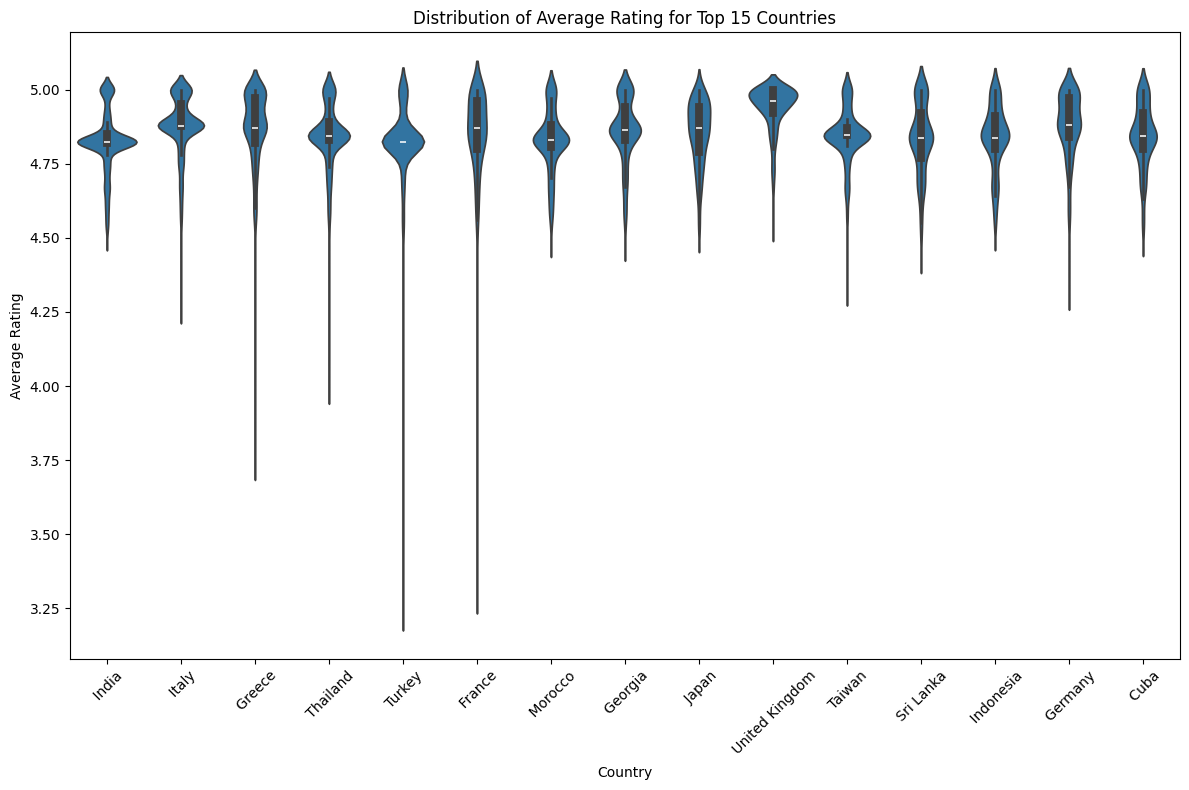

In [17]:
data_to_plot = []

for country in top_15_countries:
    avg_rating = df[df['country'] == country]['rating']
    data_to_plot.append(avg_rating)

plt.figure(figsize=(12, 8))
sns.violinplot(x=df['country'], y=df['rating'], order=top_15_countries)
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.title('Distribution of Average Rating for Top 15 Countries')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

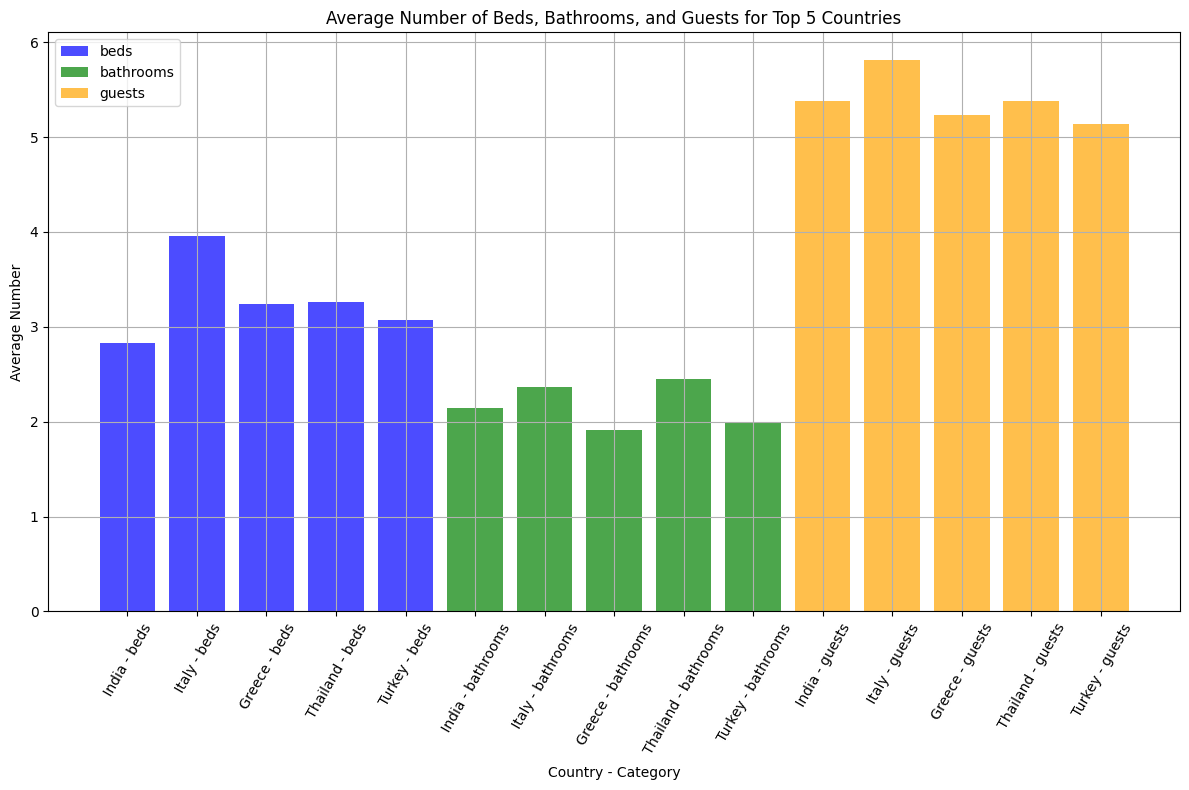

In [27]:
top_5_countries = df['country'].value_counts().nlargest(5).index.tolist()
categories = ['beds', 'bathrooms', 'guests']
colors = ['blue', 'green', 'orange']  
plt.figure(figsize=(12, 8))

for idx, category in enumerate(categories):
    data_means = []
    for country in top_5_countries:
        data = df[df['country'] == country][category].mean()
        data_means.append(data)
    
    plt.bar([f'{country} - {category}' for country in top_5_countries], data_means, alpha=0.7, label=category, color=colors[idx])
plt.xlabel('Country - Category')
plt.ylabel('Average Number')
plt.title('Average Number of Beds, Bathrooms, and Guests for Top 5 Countries')
plt.legend()
plt.xticks(rotation=60)
plt.grid(True)
plt.tight_layout()

plt.show()

C:\Users\jaink\AppData\Local\Temp\ipykernel_4660\1382613349.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='checkout_final', y='rating', hue='country', data=df_top_3, ci=None)


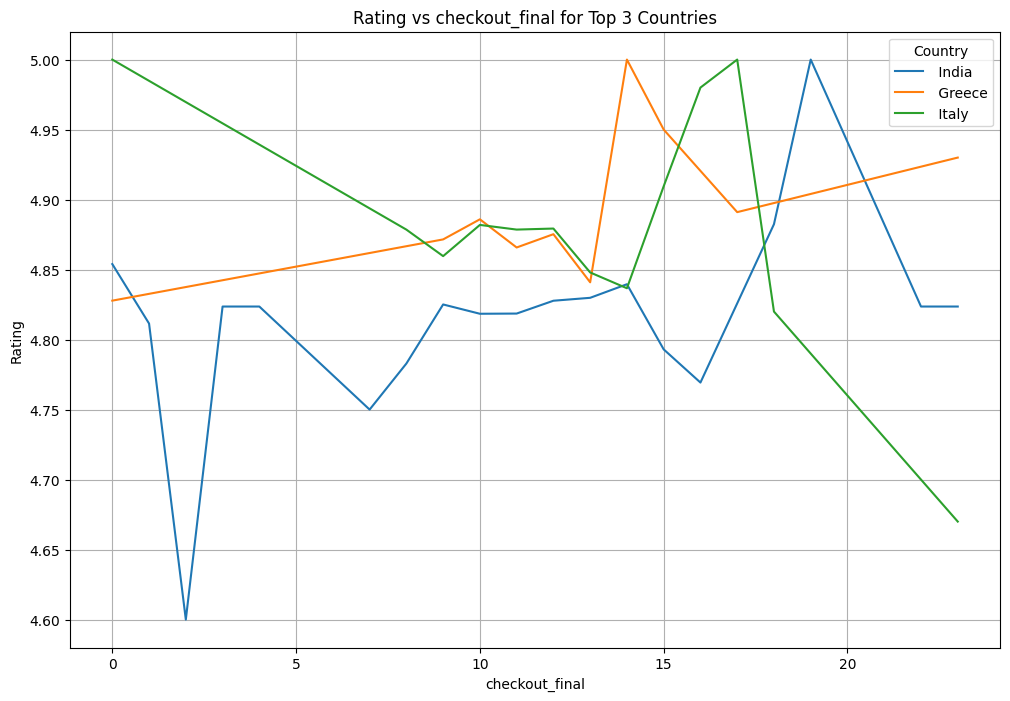

In [22]:
top_3_countries = df['country'].value_counts().head(3).index.tolist()
df_top_3 = df[df['country'].isin(top_3_countries)]

plt.figure(figsize=(12, 8))
sns.lineplot(x='checkout_final', y='rating', hue='country', data=df_top_3, ci=None)
plt.title('Rating vs checkout_final for Top 3 Countries')
plt.xlabel('checkout_final')
plt.ylabel('Rating')
plt.grid(True)
plt.legend()
plt.legend(title='Country')
plt.show()